<a href="https://colab.research.google.com/github/kostistzim/Introduction-to-Statistical-Learning-with-Python-Solutions/blob/main/3_6_Lab_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**3.6.1 Importing Packages**

In [44]:
pip install ISLP

In [45]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots

In [46]:
import statsmodels.api as sm

In [47]:
from statsmodels.stats. outliers_influence \
import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

In [48]:
from ISLP import load_data
from ISLP.models import (ModelSpec as MS ,
summarize ,
poly)

**3.6.2 Simple Linear Regression**

In this section we will construct model matrices (also called design matri-
ces) using the **ModelSpec()** transform from ISLP.models .
We will use the **Boston housing data set**, which is contained in the ISLP
package. The Boston dataset records medv (median house value) for 506
neighborhoods around Boston. We will build a regression model to pre-
dict medv using 13 predictors such as rmvar (average number of rooms per
house), age (proportion of owner-occupied units built prior to 1940), and
lstat (percent of households with low socioeconomic status). We will use
statsmodels for this task, a Python package that implements several com-
monly used regression methods.
We have included a simple loading function load_data() in the ISLP package:

In [49]:
Boston=load_data("Boston")
Boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

We start by using the sm.OLS() function to fit a simple linear regression
model. Our response will be **medv** and **lstat** will be the single predictor.
For this model, we can create the model matrix by hand.

In [50]:
X = pd.DataFrame({'intercept': np.ones(Boston.shape[0]), 'lstat':(Boston['lstat'])})

X[:4]

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94


In [51]:
#We extract the response, and fit the model.
y=Boston['medv']
model=sm.OLS(y, X)
results=model.fit()

In [52]:
summarize(results)

,coef,std err,t,P>|t|
intercept,34.5538,0.563,61.415,0.0
lstat,-0.9500,0.039,-24.528,0.0


Our model above has a single predictor, and constructing X was straight-
forward. In practice we often fit models with more than one predictor,
typically selected from an array or data frame. We may wish to introduce
transformations to the variables before fitting the model, specify interac-
tions between variables, and expand some particular variables into sets of
variables (e.g. polynomials). The sklearn package has a particular notion
for this type of task: a transform. A transform is an object that is created
with some parameters as arguments. The object has two main methods:
**fit()** and **transform()** .



In [53]:
design = MS(['lstat'])
design = design.fit(Boston)
X = design.transform(Boston)
X[:4]

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94


In this simple case, the **fit()** method does very little; it simply checks that
the variable **'lstat'** specified in design exists in Boston . Then **transform()**
constructs the model matrix with two columns: an intercept and the vari-
able lstat .
These two operations can be combined with the **fit_transform()** method.

In [54]:
design = MS(['lstat'])
X = design.fit_transform(Boston)
X[:4]

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94


In [55]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Sun, 26 Nov 2023   Prob (F-statistic):           5.08e-88
Time:                        12:36:29   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
results.params

intercept    34.553841
lstat        -0.950049
dtype: float64

In [57]:
new_df=pd.DataFrame({'lstat':[5,10,15]})
newX=design.transform(new_df)
newX

,intercept,lstat
0,1.0,5
1,1.0,10
2,1.0,15


In [58]:
new_predictions=results.get_prediction(newX)
new_predictions.predicted_mean

array([29.80359411, 25.05334734, 20.30310057])

In [59]:
new_predictions.conf_int(alpha =0.05)

array([[29.00741194, 30.59977628],
       [24.47413202, 25.63256267],
       [19.73158815, 20.87461299]])

In [60]:
 new_predictions.conf_int(obs=True , alpha =0.05)

array([[17.56567478, 42.04151344],
       [12.82762635, 37.27906833],
       [ 8.0777421 , 32.52845905]])

For instance, the 95% confidence interval associated with an lstat value of
10 is (24.47, 25.63), and the 95% prediction interval is (12.82, 37.28). As
expected, the confidence and prediction intervals are centered around the
same point (a predicted value of 25.05 for medv when lstat equals 10), but
the latter are substantially wider.
Next we will plot medv and lstat using DataFrame.plot.scatter() , and
wish to add the regression line to the resulting plot.

In [61]:
def abline(ax, b, m, *args, **kwargs):
  #Add a line with slope m and intercept b to ax
  xlim= ax.get_xlim()
  ylim=[m*xlim[0] + b, m*xlim[1] + b]
  ax.plot(xlim, ylim,*args, **kwargs)


Let’s use our new function to add this regression line to a plot of medv
vs. lstat .

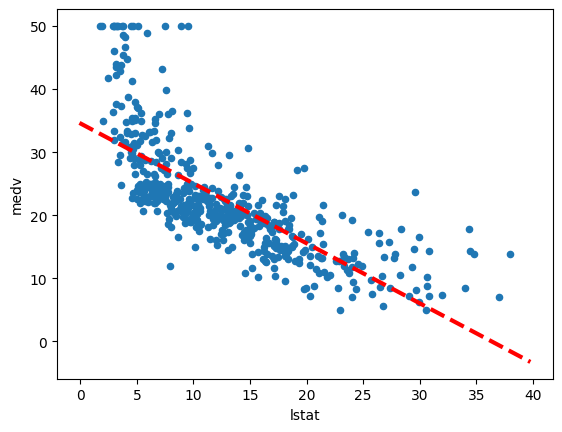

In [62]:
ax = Boston.plot.scatter('lstat', 'medv')
abline(ax ,
  results.params [0],
  results.params [1], 'r--',
  linewidth=3)

# **3.6.3 Multiple Linear Regression**